# 🧱 INT304 Support Vector Machine (SVM)

The **Support Vector Machine (SVM)** is a powerful supervised learning model that finds the optimal hyperplane separating data from different classes with the **maximum margin**.

SVM works well in high-dimensional spaces and is effective when the number of features exceeds the number of samples.

#### 📐 Objective Function

For linearly separable data, SVM solves:

$$
\min_{w, b} \quad \frac{1}{2} \|w\|^2 \quad \text{subject to } \quad y_i(w^T x_i + b) \geq 1
$$

This maximizes the margin between classes while ensuring correct classification.

#### 🧠 Kernels

To handle non-linearly separable data, SVM uses **kernel functions** to map input data into a higher-dimensional space. Common kernels:

- `'linear'`: $K(x_i, x_j) = x_i^T x_j$
- `'poly'`: $K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$
- `'rbf'`: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
- `'sigmoid'`: $K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$

We will use `sklearn`'s `SVC` (Support Vector Classifier) to implement SVM efficiently.

---

## sklearn.svm.SVC

In [4]:
# import necessary libs
from sklearn.datasets import load_digits
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

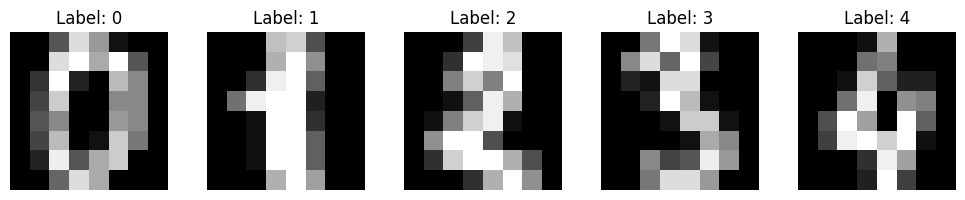

KeyboardInterrupt: 

In [5]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Show first few samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

# Train SVM
clf = svm.SVC(kernel='linear')  # You may want to tune kernel, C, gamma
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### 🔧 Parameters you may tune for training



- ####**`C`: float, default = 1.0**  
  Regularization parameter. The strength of the regularization is inversely proportional to $C$.  
  Must be strictly positive. The penalty is a squared $L_2$ penalty.

- **`kernel`: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'` or callable, default = `'rbf'`**  
  Specifies the kernel type to be used in the algorithm.  
  If none is given, `'rbf'` will be used.  
  If a callable is given, it is used to pre-compute the kernel matrix from data matrices;  
  that matrix should be an array of shape $(n\_samples, n\_samples)$.  
  For an intuitive visualization of different kernel types, see *Plot classification boundaries with different SVM Kernels*.

- **`degree`: int, default = 3**  
  Degree of the polynomial kernel function (`'poly'`). Must be non-negative.  
  Ignored by all other kernels.

- **`coef0`: float, default = 0.0**  
  Independent term in kernel function. It is only significant in `'poly'` and `'sigmoid'`.

- **`tol`: float, default = $1e-3$**  
  Tolerance for stopping criterion.
  
#### Observe:

- Does overfitting or underfitting occur with certain parameter choices?

---

## `sklearn.svm.SVR`

**Support Vector Regression (SVR)** is an extension of Support Vector Machines (SVM) to regression tasks. Unlike linear regression, which minimizes squared errors, SVR aims to fit a function that deviates from actual targets by at most $\epsilon$, while also being as flat as possible.

#### 🧮 Optimization Objective

SVR minimizes the following:

$$
\min_{w, b, \xi, \xi^*} \ \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

Subject to:

$$
\begin{align*}
y_i - (w^T x_i + b) &\leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i &\leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{align*}
$$

Where:

- $C$ is the regularization parameter
- $\epsilon$ defines a margin of tolerance (called the $\epsilon$-tube)
- $\xi_i$, $\xi_i^*$ are slack variables for errors outside the $\epsilon$-tube

SVR works well when the data is noisy and you want to balance between **model complexity** and **precision tolerance**.

In [1]:
# import necessary libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

file_path = "boston.txt"
raw_df = pd.read_csv(file_path, sep=r"\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)

model = SVR() # you need tuning here
model.fit(norm_x_train, y_train)
y_pred = model.predict(norm_x_test)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}')

KeyboardInterrupt: 

Plot actual vs predicted values. Are there consistent under- or over-estimations?

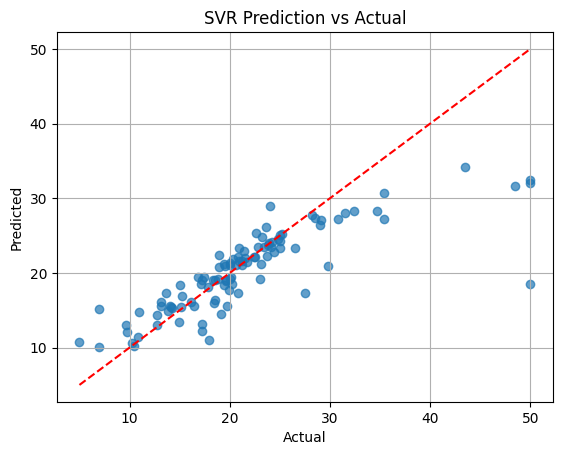

In [12]:
# plot actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR Prediction vs Actual")
plt.grid(True)
plt.show()

### 🔧 Parameters you may tune for training



- **`kernel`: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'` or callable, default = `'rbf'`**  
  Specifies the kernel type to be used in the algorithm.  
  If none is given, `'rbf'` will be used.  
  If a callable is given, it is used to precompute the kernel matrix.

- **`degree`: int, default = 3**  
  Degree of the polynomial kernel function (`'poly'`). Must be non-negative.  
  Ignored by all other kernels.

- **`coef0`: float, default = 0.0**  
  Independent term in kernel function. It is only significant in `'poly'` and `'sigmoid'`.

- **`tol`: float, default = $1e-3$**  
  Tolerance for stopping criterion.

- **`C`: float, default = 1.0**  
  Regularization parameter. The strength of the regularization is inversely proportional to $C$.  
  Must be strictly positive. The penalty is a squared $L_2$ penalty.

- **`epsilon`: float, default = 0.1**  
  Epsilon in the epsilon-SVR model.  
  It specifies the epsilon-tube within which no penalty is associated in the training loss function  
  with points predicted within a distance epsilon from the actual value.  
  Must be non-negative.